In [1]:
import pandas as pd
import numpy as np
from files.algo import lm_NFLP, optim_NFLP_reg
import matplotlib.pyplot as plt
from files.thresh import threshold

In [129]:
df = pd.read_csv('/Users/harshit/Downloads/sampled_data613.csv')

In [130]:
df

,AGE,Years_Education,INCWAGE,Exp,Exp2
0,43,13.0,10.616437,30.0,900.0
1,32,18.0,11.775290,14.0,196.0
2,29,12.0,9.546813,17.0,289.0
3,50,12.0,9.852194,38.0,1444.0
4,63,13.0,11.314475,50.0,2500.0
...,...,...,...,...,...
318079,35,8.0,9.305651,27.0,729.0
318080,47,16.0,11.066638,31.0,961.0
318081,28,16.0,11.461632,12.0,144.0
318082,62,8.0,10.146434,54.0,2916.0


In [131]:
X = df[['Years_Education', 'Exp', 'Exp2']]
y = df['INCWAGE']

In [135]:
y.median()

np.float64(10.545341438708522)

In [109]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
#                                                     random_state=613)

X_aug = np.c_[np.ones(X.shape[0]), X]


OLS

In [110]:
X_aug.shape

(318084, 4)

In [111]:
np.mean(X_aug, axis=0)

array([1.00000000e+00, 1.38384106e+01, 2.92459350e+01, 1.09455652e+03])

In [112]:
theta = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y

In [113]:
theta

array([ 6.61114612e+00,  1.36169021e-01,  1.26458048e-01, -1.73565046e-03])

NFLP

2 min

In [114]:
# reg_result = lm_NFLP(y, X_aug, intercept=False)

In [115]:
import pickle
# with open('EcoInter1.pkl', 'wb') as f:
#     pickle.dump(reg_result, f)

In [116]:
with open('EcoInter1.pkl', 'rb') as f:
    reg_result = pickle.load(f)

In [117]:
reg_result['omega']

np.float64(0.9564163237795216)

In [118]:
reg_result['beta']

array([ 6.67985607e+00,  1.44087455e-01,  1.22497319e-01, -1.68145770e-03])

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
/var/folders/7w/3vj71g3x61v5rw8zzntby1m00000gn/T/ipykernel_10745/1432999052.py:3: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\pi$ values', fontsize=12)
/var/folders/7w/3vj71g3x61v5rw8zzntby1m00000gn/T/ipykernel_10745/1432999052.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Histogram of $\pi$ values', fontsize=14)


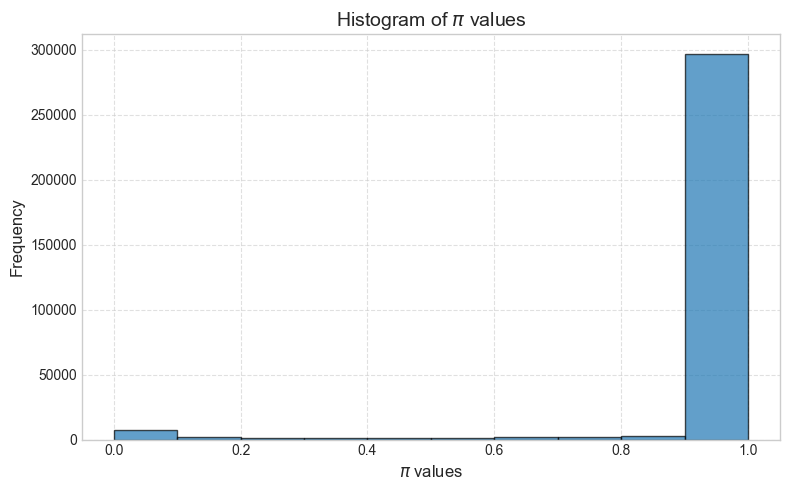

In [119]:
plt.figure(figsize=(8, 5))
plt.hist(reg_result['Pi'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('$\pi$ values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of $\pi$ values', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Outliers

In [126]:
np.sum(reg_result['Pi'] <= 0.5) / 318084

np.float64(0.04249820802052288)

In [127]:
0.04249820802052288 + 0.9564163237795216

0.9989145318000444


THRESHOLD: 1.0
Number of Outliers: 318084
Number of Normals: 259953
y_OUTLIER MEAN: 10.294125286496621
y_NORMAL MEAN: 10.505875819870726

		INTERCEPT 	 EDUC 		 EXP 		 EXT^2
X_OUTLIER MEAN: [1.00000000e+00 1.38384106e+01 2.92459350e+01 1.09455652e+03]
X_NORMAL MEAN: [1.00000000e+00 1.39085450e+01 2.91718349e+01 1.07791401e+03]

		  MAX		  MIN		MEDIAN
y_OUT: 13.482831119581755 1.3862943611198906 10.545341438708522
y_NORMAL: 13.348701819615057 5.521460917862246 10.596634733096073


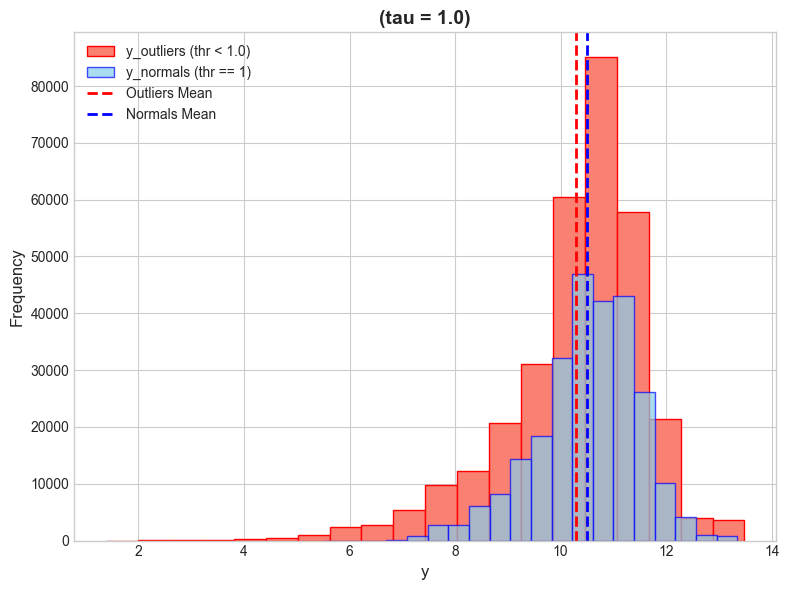


THRESHOLD: 0.75
Number of Outliers: 17616
Number of Normals: 259953
y_OUTLIER MEAN: 7.563278759025097
y_NORMAL MEAN: 10.505875819870726

		INTERCEPT 	 EDUC 		 EXP 		 EXT^2
X_OUTLIER MEAN: [1.00000000e+00 1.31369210e+01 3.07952430e+01 1.30906636e+03]
X_NORMAL MEAN: [1.00000000e+00 1.39085450e+01 2.91718349e+01 1.07791401e+03]

		  MAX		  MIN		MEDIAN
y_OUT: 13.482831119581755 1.3862943611198906 7.24422751560335
y_NORMAL: 13.348701819615057 5.521460917862246 10.596634733096073


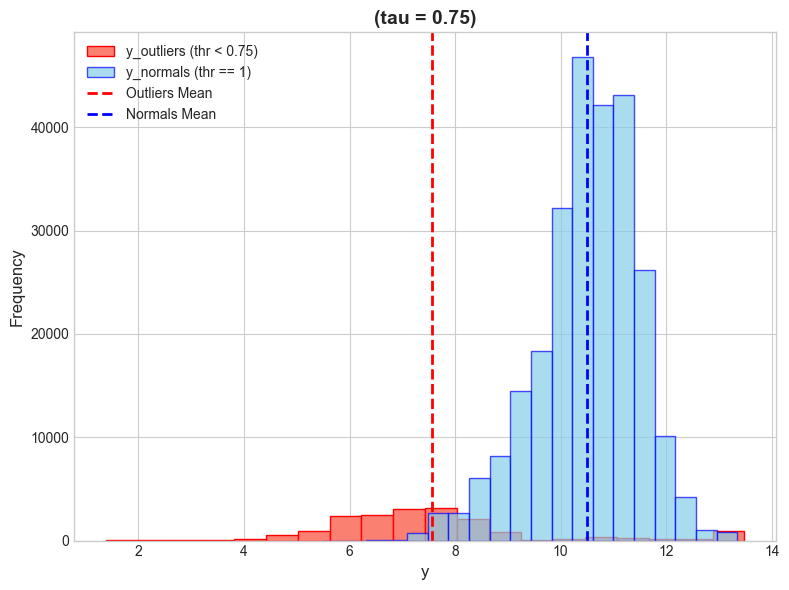


THRESHOLD: 0.5
Number of Outliers: 13518
Number of Normals: 259953
y_OUTLIER MEAN: 7.213293850309137
y_NORMAL MEAN: 10.505875819870726

		INTERCEPT 	 EDUC 		 EXP 		 EXT^2
X_OUTLIER MEAN: [1.00000000e+00 1.31653351e+01 3.11102234e+01 1.33149593e+03]
X_NORMAL MEAN: [1.00000000e+00 1.39085450e+01 2.91718349e+01 1.07791401e+03]

		  MAX		  MIN		MEDIAN
y_OUT: 13.482831119581755 1.3862943611198906 6.907755278982137
y_NORMAL: 13.348701819615057 5.521460917862246 10.596634733096073


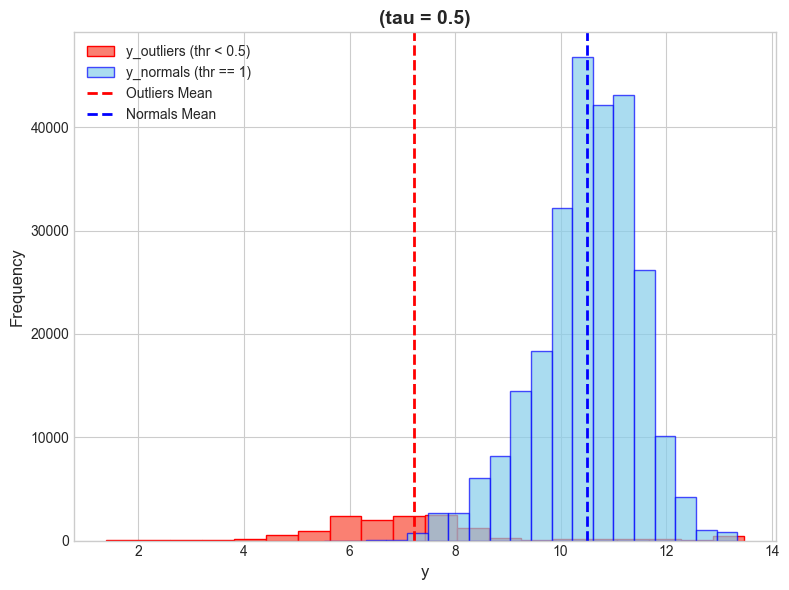


THRESHOLD: 0.25
Number of Outliers: 9883
Number of Normals: 259953
y_OUTLIER MEAN: 6.841360504341775
y_NORMAL MEAN: 10.505875819870726

		INTERCEPT 	 EDUC 		 EXP 		 EXT^2
X_OUTLIER MEAN: [1.00000000e+00 1.32586259e+01 3.15106749e+01 1.35093494e+03]
X_NORMAL MEAN: [1.00000000e+00 1.39085450e+01 2.91718349e+01 1.07791401e+03]

		  MAX		  MIN		MEDIAN
y_OUT: 13.482831119581755 1.3862943611198906 6.684611727667927
y_NORMAL: 13.348701819615057 5.521460917862246 10.596634733096073


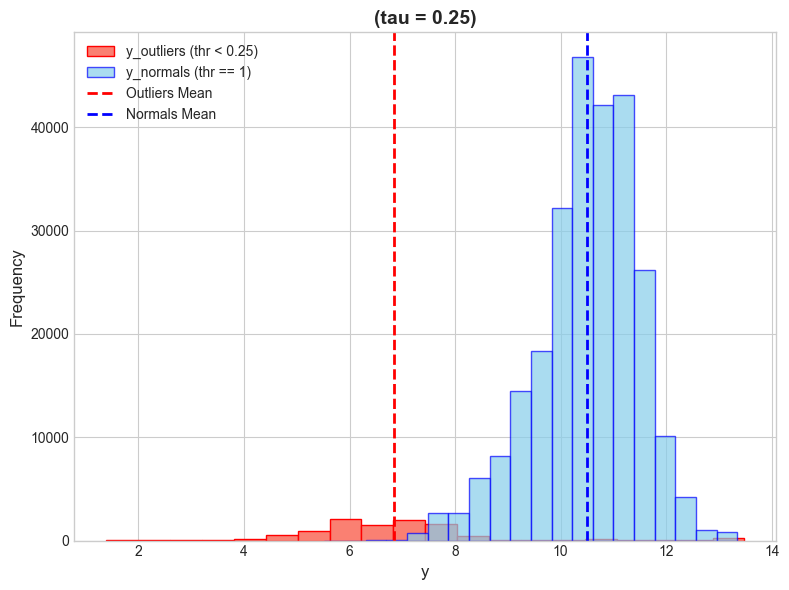


THRESHOLD: 0.01
Number of Outliers: 3813
Number of Normals: 259953
y_OUTLIER MEAN: 5.944552092402716
y_NORMAL MEAN: 10.505875819870726

		INTERCEPT 	 EDUC 		 EXP 		 EXT^2
X_OUTLIER MEAN: [1.00000000e+00 1.36989247e+01 3.29367952e+01 1.40862051e+03]
X_NORMAL MEAN: [1.00000000e+00 1.39085450e+01 2.91718349e+01 1.07791401e+03]

		  MAX		  MIN		MEDIAN
y_OUT: 13.482831119581755 1.3862943611198906 5.991464547107982
y_NORMAL: 13.348701819615057 5.521460917862246 10.596634733096073


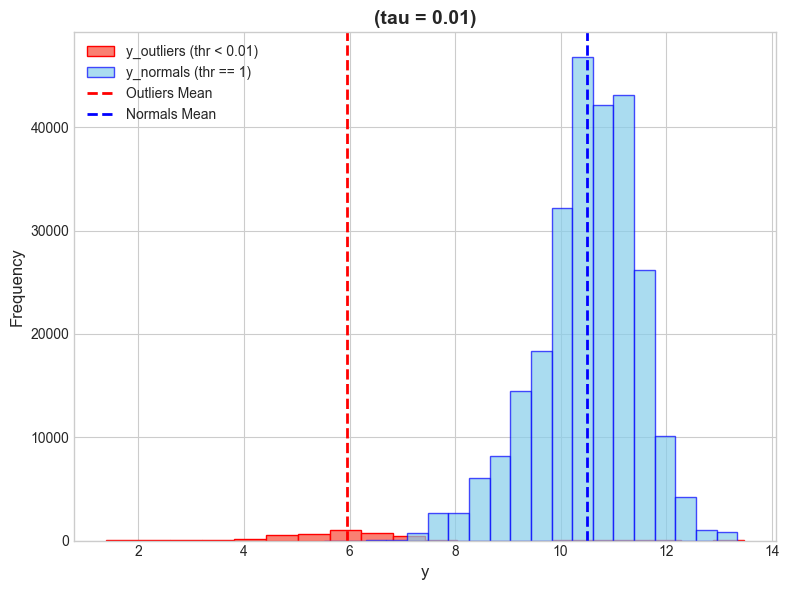

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")  
thresholds = [1.0, 0.75, 0.5, 0.25, 0.01]

for thr in thresholds:
    print(f"\n{'='*40}\nTHRESHOLD: {thr}\n{'='*40}")

    cond = reg_result['Pi'] <= thr
    mask = cond

    X_out = X_aug[mask]
    y_out = np.array(y)[mask]
    X_normal = X_aug[reg_result['Pi'] == 1]
    y_normal = np.array(y)[reg_result['Pi'] == 1]

    print("Number of Outliers:", len(X_out))
    print("Number of Normals:", len(X_normal))

    print('y_OUTLIER MEAN:', np.mean(y_out))
    print('y_NORMAL MEAN:', np.mean(y_normal))

    print("\n\t\tINTERCEPT \t EDUC \t\t EXP \t\t EXT^2")
    print('X_OUTLIER MEAN:', np.mean(X_out, axis=0))
    print('X_NORMAL MEAN:', np.mean(X_normal, axis=0))

    print("\n\t\t  MAX\t\t  MIN\t\tMEDIAN")
    print('y_OUT:', np.max(y_out), np.min(y_out), np.median(y_out))
    print('y_NORMAL:', np.max(y_normal), np.min(y_normal), np.median(y_normal))

    plt.figure(figsize=(8, 6))

    plt.hist(y_out, bins=20, color='salmon', alpha=1, edgecolor='red',
            label=f'y_outliers (thr < {thr})')
    plt.hist(y_normal, bins=20, color='skyblue', alpha=0.7, edgecolor='blue',
            label=f'y_normals (thr == 1)')

    plt.axvline(np.mean(y_out), color='red', linestyle='--', linewidth=2,
                label='Outliers Mean')
    plt.axvline(np.mean(y_normal), color='blue', linestyle='--', linewidth=2,
                label='Normals Mean')

    plt.title(f'(tau = {thr})', fontsize=14, weight='bold')
    plt.xlabel('y', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

In [55]:
arr1 = np.array([6.60899028e+00, 1.36745442e-01, 1.25869736e-01, -1.72499293e-03])
arr2 = np.array([6.67733121e+00, 1.44428608e-01, 1.22163666e-01, -1.67461728e-03])

beta_ground = np.mean(np.array([arr1, arr2]), axis=0)

In [56]:
X_aug.shape

(318084, 4)

In [14]:
with open('EcoInter.pkl', 'rb') as f:
    reg_result = pickle.load(f)

10 perc outliers at diff extremes (4min20sec)

(78016, 4) (240068, 4)
(17616, 4) (240068, 4)
(13518, 4) (240068, 4)
(9883, 4) (240068, 4)
(3813, 4) (240068, 4)


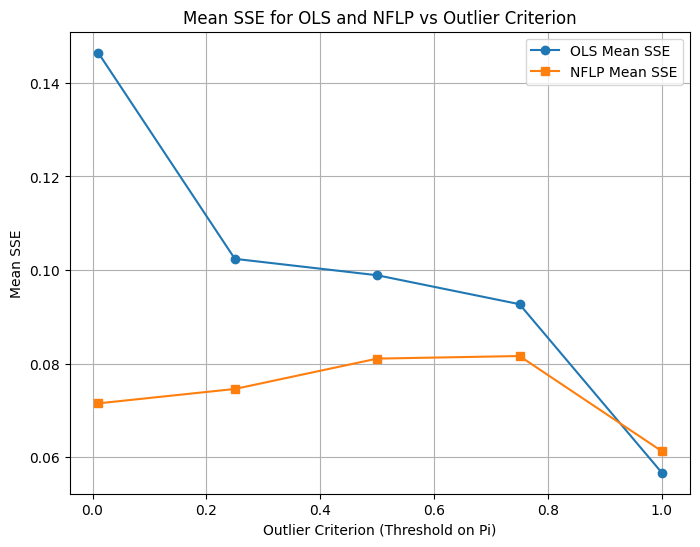

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def sse(x, y):
    return np.sum((x - y) ** 2)

Pi_full = reg_result['Pi']

thresholds = [1, 0.75, 0.5, 0.25, 0.01]

n_total = 1000
n_out = int(0.10 * n_total)   # 100 out
n_normal = n_total - n_out    # 900 normal

mean_sse_ols = []
mean_sse_nflp = []

for threshold in thresholds:
    sse_ols_list = []
    sse_nflp_list = []
    
    mask = (Pi_full < threshold)
    X_out_full = X_aug[mask]
    y_out_full = y[mask]
    X_normal_full = X_aug[(Pi_full == 1)]
    y_normal_full = y[(Pi_full == 1)]
    print(X_out_full.shape, X_normal_full.shape)

    y_out_full = np.array(y_out_full)
    y_normal_full = np.array(y_normal_full)
    
    for _ in range(500):
        idx_out = np.random.choice(len(X_out_full), size=n_out, replace=False)
        idx_normal = np.random.choice(len(X_normal_full), size=n_normal, replace=False)
        
        X_combined = np.vstack((X_out_full[idx_out], X_normal_full[idx_normal]))
        y_combined = np.concatenate((y_out_full[idx_out], y_normal_full[idx_normal]))
        #OLS
        theta_ols = np.linalg.inv(X_combined.T @ X_combined) @ X_combined.T @ y_combined
        #NFLP
        reg_result = lm_NFLP(y_combined.flatten(), X_combined, intercept=False, omega=0.9)
        theta_nflp = reg_result['beta']
        
        sse_ols_list.append(sse(theta_ols, beta_ground))
        sse_nflp_list.append(sse(theta_nflp, beta_ground))
    
    mean_sse_ols.append(np.mean(sse_ols_list))
    mean_sse_nflp.append(np.mean(sse_nflp_list))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, mean_sse_ols, marker='o', label='OLS Mean SSE')
plt.plot(thresholds, mean_sse_nflp, marker='s', label='NFLP Mean SSE')
plt.xlabel('Outlier Criterion (Threshold on Pi)')
plt.ylabel('Mean SSE')
plt.title('Mean SSE for OLS and NFLP vs Outlier Criterion')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
mean_sse_nflp = [np.float64(0.06131442017792774),
 np.float64(0.08163995011115022),
 np.float64(0.08108817328438361),
 np.float64(0.07460785187468467),
 np.float64(0.07153270496677977)]


In [62]:
mean_sse_ols = [np.float64(0.05672107311670018),
 np.float64(0.09270839153977596),
 np.float64(0.0988916056928706),
 np.float64(0.10239607491380386),
 np.float64(0.1464116065095721)]


In [63]:
thresholds = [1, 0.75, 0.5, 0.25, 0.01]


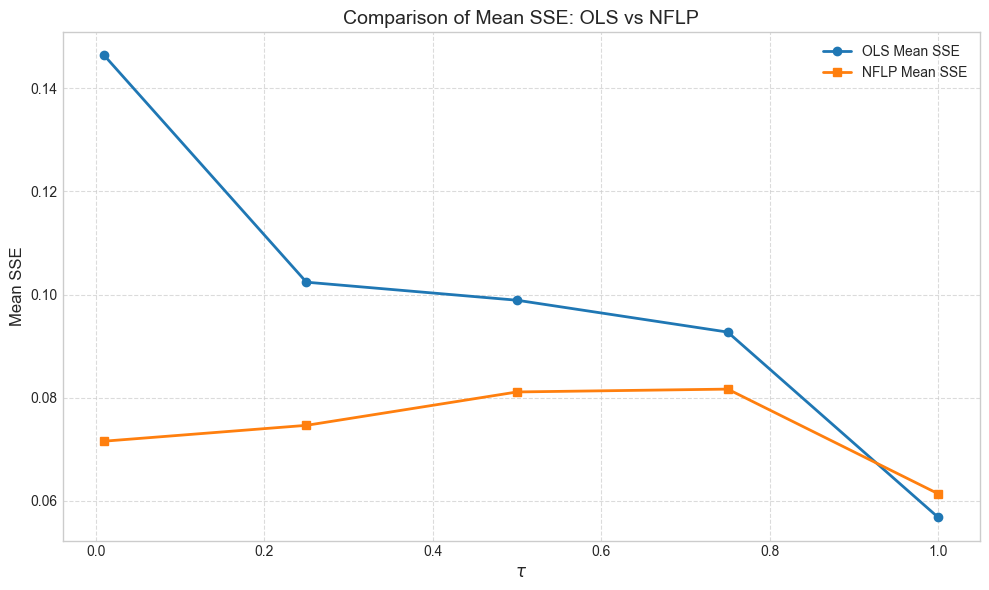

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, mean_sse_ols, marker='o', linestyle='-', linewidth=2, label='OLS Mean SSE')
plt.plot(thresholds, mean_sse_nflp, marker='s', linestyle='-', linewidth=2, label='NFLP Mean SSE')
plt.xlabel(r'$\tau$', fontsize=12)
plt.ylabel('Mean SSE', fontsize=12)
plt.title('Comparison of Mean SSE: OLS vs NFLP', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [71]:
with open('EcoInter.pkl', 'rb') as f:
    reg_result = pickle.load(f)

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def sse(x, y):
    return np.sum((x - y) ** 2)

outlier_percentages = list(range(10, 50, 5))

mean_sse_ols = []
mean_sse_nflp = []
n_total = 1000


mask = (reg_result['Pi'] < 0.1)
X_out = X_aug[mask]
y_out = y[mask]
X_normal = X_aug[(reg_result['Pi'] == 1)]
y_normal = y[(reg_result['Pi'] == 1)]

y_out = np.array(y_out)
y_normal = np.array(y_normal)

In [73]:
y_out.shape, X_normal.shape

((7160,), (240068, 4))

10
15
20
25
30
35
40
45


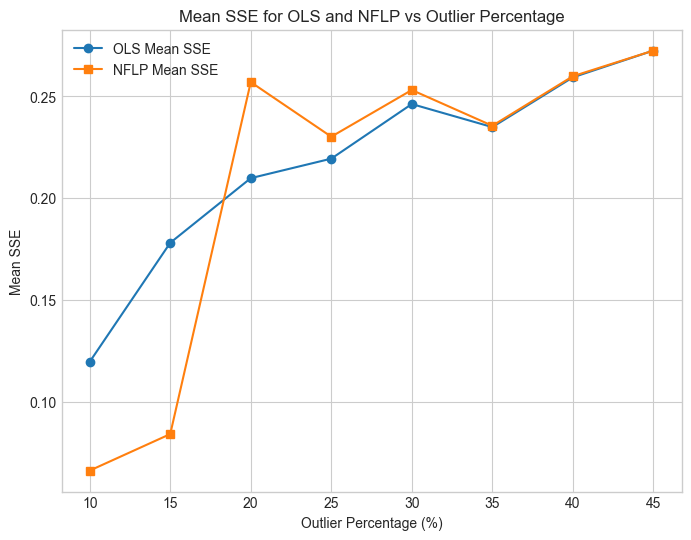

In [74]:
for perc in outlier_percentages:
    sse_ols_list = []
    sse_nflp_list = []
    print(perc)
    for _ in range(500):
        n_out = int((perc / 100) * n_total)
        n_normal = n_total - n_out
        # print(n_out, n_normal)

        idx_out = np.random.choice(len(X_out), size=n_out, replace=False)
        idx_normal = np.random.choice(len(X_normal), size=n_normal, replace=False)

        X_out_sample = X_out[idx_out]
        y_out_sample = y_out[idx_out]
        X_normal_sample = X_normal[idx_normal]
        y_normal_sample = y_normal[idx_normal]

        X_combined = np.vstack((X_out_sample, X_normal_sample))
        y_combined = np.concatenate((y_out_sample, y_normal_sample))
        # print(X_combined.shape)

        theta_ols = np.linalg.inv(X_combined.T @ X_combined) @ X_combined.T @ y_combined

        reg_result = lm_NFLP(y_combined.flatten(), X_combined, intercept=False, omega=0.8)
        theta_nflp = reg_result['beta']
        
        sse_ols_val = sse(theta_ols, beta_ground)
        sse_nflp_val = sse(theta_nflp, beta_ground)
        
        sse_ols_list.append(sse_ols_val)
        sse_nflp_list.append(sse_nflp_val)
    
    mean_sse_ols.append(np.mean(sse_ols_list))
    mean_sse_nflp.append(np.mean(sse_nflp_list))

plt.figure(figsize=(8, 6))
plt.plot(outlier_percentages, mean_sse_ols, marker='o', label='OLS Mean SSE')
plt.plot(outlier_percentages, mean_sse_nflp, marker='s', label='NFLP Mean SSE')
plt.xlabel('Outlier Percentage (%)')
plt.ylabel('Mean SSE')
plt.title('Mean SSE for OLS and NFLP vs Outlier Percentage')
plt.legend()
plt.grid(True)
plt.show()


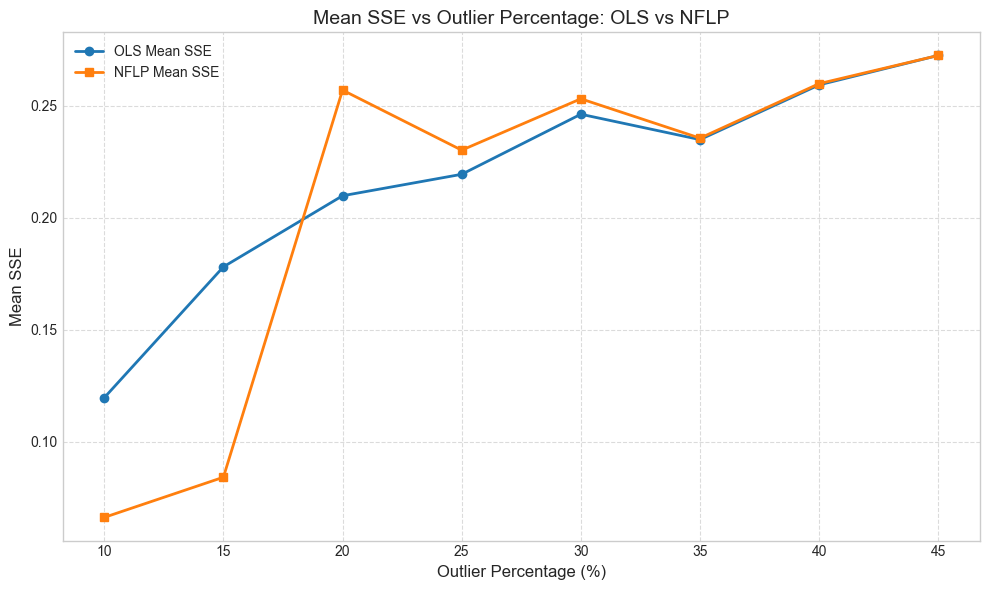

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(outlier_percentages, mean_sse_ols, marker='o', linestyle='-', linewidth=2, label='OLS Mean SSE')
plt.plot(outlier_percentages, mean_sse_nflp, marker='s', linestyle='-', linewidth=2, label='NFLP Mean SSE')
plt.xlabel('Outlier Percentage (%)', fontsize=12)
plt.ylabel('Mean SSE', fontsize=12)
plt.title('Mean SSE vs Outlier Percentage: OLS vs NFLP', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
perc = 20
sse_ols_list = []
sse_nflp_list = []
print(perc)
for _ in range(500):
    n_out = int((perc / 100) * n_total)
    n_normal = n_total - n_out
    # print(n_out, n_normal)

    idx_out = np.random.choice(len(X_out), size=n_out, replace=False)
    idx_normal = np.random.choice(len(X_normal), size=n_normal, replace=False)

    X_out_sample = X_out[idx_out]
    y_out_sample = y_out[idx_out]
    X_normal_sample = X_normal[idx_normal]
    y_normal_sample = y_normal[idx_normal]

    X_combined = np.vstack((X_out_sample, X_normal_sample))
    y_combined = np.concatenate((y_out_sample, y_normal_sample))
    # print(X_combined.shape)

    theta_ols = np.linalg.inv(X_combined.T @ X_combined) @ X_combined.T @ y_combined

    reg_result = lm_NFLP(y_combined.flatten(), X_combined, intercept=False, omega=0.8)
    theta_nflp = reg_result['beta']
    
    sse_ols_val = sse(theta_ols, beta_ground)
    sse_nflp_val = sse(theta_nflp, beta_ground)
    
    sse_ols_list.append(sse_ols_val)
    sse_nflp_list.append(sse_nflp_val)

print(np.mean(sse_ols_list))
print(np.mean(sse_nflp_list))


20
0.17550519163627737
0.20996570649878749


In [ ]:
sse_ols_list

In [31]:
mean_sse_ols

[np.float64(0.1324686330749431),
 np.float64(0.16443108454755823),
 np.float64(0.19009804077266618),
 np.float64(0.18470067902926704),
 np.float64(0.25967676831803965),
 np.float64(0.2471937118239207),
 np.float64(0.28807365561994824),
 np.float64(0.27962796500936277)]

In [32]:
mean_sse_nflp

[np.float64(0.08268371412749943),
 np.float64(0.08114301707510034),
 np.float64(0.23795726372765),
 np.float64(0.19367749037622087),
 np.float64(0.26560082157952375),
 np.float64(0.2482720339546332),
 np.float64(0.2881296121382332),
 np.float64(0.27983298205741797)]